In class we described the Gaussian pyramid constructed using the REDUCE operator. 

1.1 Write a function to implement REDUCE. Use this to produce a Gaussian Pyramid of 4 levels
(0-3). Demonstrate using the first frame of the DataSeq1 sequence.
Output: The code, and the 4 images that make up the Gaussian Pyramid

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [3]:
im1_dataseq1 = cv.imread('DataSeq1\yos_img_01.jpg', cv.IMREAD_GRAYSCALE)

In [4]:
#Implement Reduce function
def reduction(im, a=0.4):
    #Convolution filter
    w_vector = np.array([[1/4 - a/2, 1/4, a, 1/4, 1/4 - a/2]])
    w = np.transpose(w_vector) * w_vector
    im_reduced = np.zeros((im.shape[0] // 2, im.shape[1] // 2))

    #Convolution and  downsampling operation
    for i in range(0, im_reduced.shape[0]):
            
        for j in range(0, im_reduced.shape[1]):

            for m in range(0, w.shape[0]):
                    
                for n in range(0, w.shape[1]):
                    
                    if 2*i + m -2 < im.shape[0] and 2*j + n -2 < im.shape[1] and 2*i + m -2 >= 0 and 2*j + n -2 >= 0:
                                                
                            im_reduced[i, j] = im_reduced[i, j] + w[m, n] * im[2 * i + m - 2, 2 * j + n - 2]


    return im_reduced

In [5]:
g1 = reduction(im1_dataseq1)
g2 = reduction(g1)
g3 = reduction(g2)
g4 = reduction(g3)

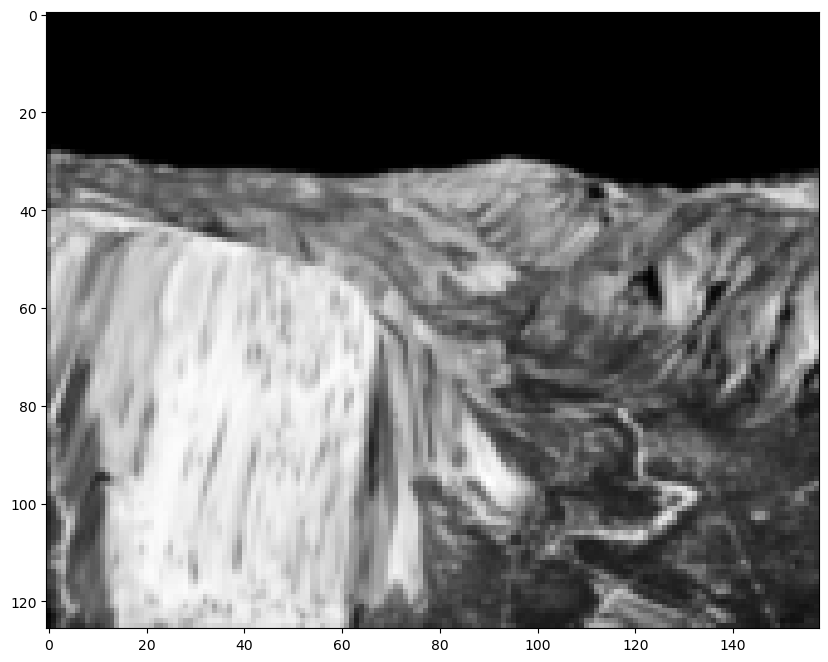

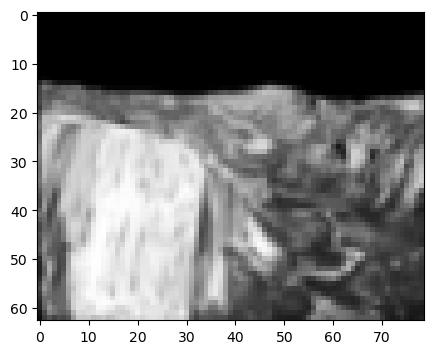

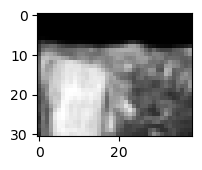

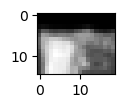

In [6]:
#Ploting the results
plt.figure(figsize=(np.shape(g1)[1]//15,np.shape(g1)[0]//15))
plt.imshow(g1, cmap='gray')
plt.show()
plt.figure(figsize=(np.shape(g2)[1]//15,np.shape(g2)[0]//15))
plt.imshow(g2, cmap='gray')
plt.show()
plt.figure(figsize=(np.shape(g3)[1]//15,np.shape(g3)[0]//15))
plt.imshow(g3, cmap='gray')
plt.show()
plt.figure(figsize=(np.shape(g4)[1]//15,np.shape(g4)[0]//15))
plt.imshow(g4, cmap='gray')
plt.show()


1.2 Write the function EXPAND. Using it and the above REDUCE, create the 4 level Laplacian pyramid
of DataSeq1 (which has 1 Gaussian image and the 3 Laplacian images).
Output: The code and the Laplacian pyramid images (3 Laplacian images and 1 Gaussian
image) of the first image of DataSeq1.

In [7]:
#Implement Expand function like the reduce one
def expand(im, a=0.4, exp=0):
    
    #Convolution filter
   w_vector = np.array([[1/4 - a/2, 1/4, a, 1/4, 1/4 - a/2]])
   w = np.transpose(w_vector) * w_vector
    
   im_expanded = np.zeros((im.shape[0] * 2 + exp , im.shape[1] * 2 + exp ))
      
    #Convolution and  upsampling operation
   for i in range (0, im_expanded.shape[0]):
        
      for j in range (0, im_expanded.shape[1]):
            
         for m in range (0, w.shape[0]):

            x = (i+m-2)/2

            if (i+m-2)%2 != 0:
               continue
            for n in range (0, w.shape[1]):
                    
               y = (j+n-2)/2
               if (j+n-2)%2 != 0:
                  continue
                   
               if x >= 0 and y >= 0 and x < im.shape[0] and y < im.shape[1]:
                    
                  x=int(x)
                  y=int(y)
                  im_expanded[i,j] = im_expanded[i,j] + 4 * w[m,n] * im[x, y]

   return im_expanded

In [8]:
exp1= np.shape(g1)[0] - 2 * np.shape(g2)[0]

exp2 = np.shape(g2)[0] - 2 * np.shape(g3)[0]

exp3 = np.shape(g3)[0] - 2 * np.shape(g4)[0]

exp0 = np.shape(im1_dataseq1)[0] - 2 * np.shape(g1)[0]


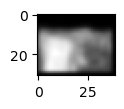

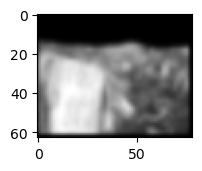

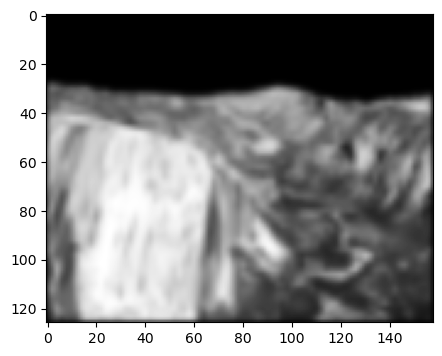

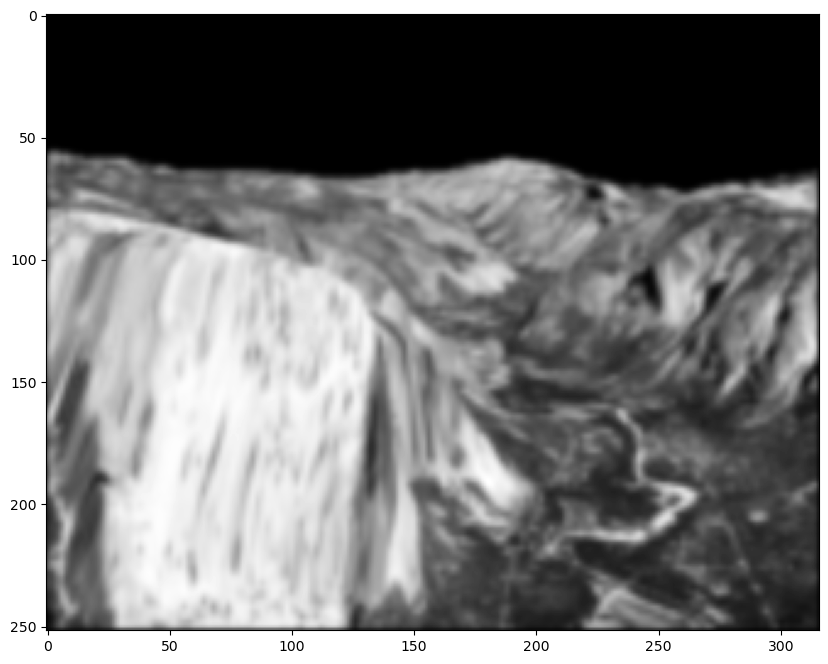

In [9]:
expanded_im1_3_level=expand(g4, exp=exp3)
plt.figure(figsize=(np.shape(expanded_im1_3_level)[1]//30,np.shape(expanded_im1_3_level)[0]//30))
plt.imshow(expanded_im1_3_level, cmap='gray')
plt.show()

expanded_im1_2_level=expand(g3, exp=exp2)
plt.figure(figsize=(np.shape(expanded_im1_2_level)[1]//30,np.shape(expanded_im1_2_level)[0]//30))
plt.imshow(expanded_im1_2_level, cmap='gray')
plt.show()

expanded_im1_1_level=expand(g2, exp = exp1)
plt.figure(figsize=(np.shape(expanded_im1_1_level)[1]//30,np.shape(expanded_im1_1_level)[0]//30))
plt.imshow(expanded_im1_1_level, cmap='gray')
plt.show()

expanded_im1_0_level=expand(g1, exp=exp0)
plt.figure(figsize=(np.shape(expanded_im1_0_level)[1]//30,np.shape(expanded_im1_0_level)[0]//30))
plt.imshow(expanded_im1_0_level, cmap='gray')
plt.show()

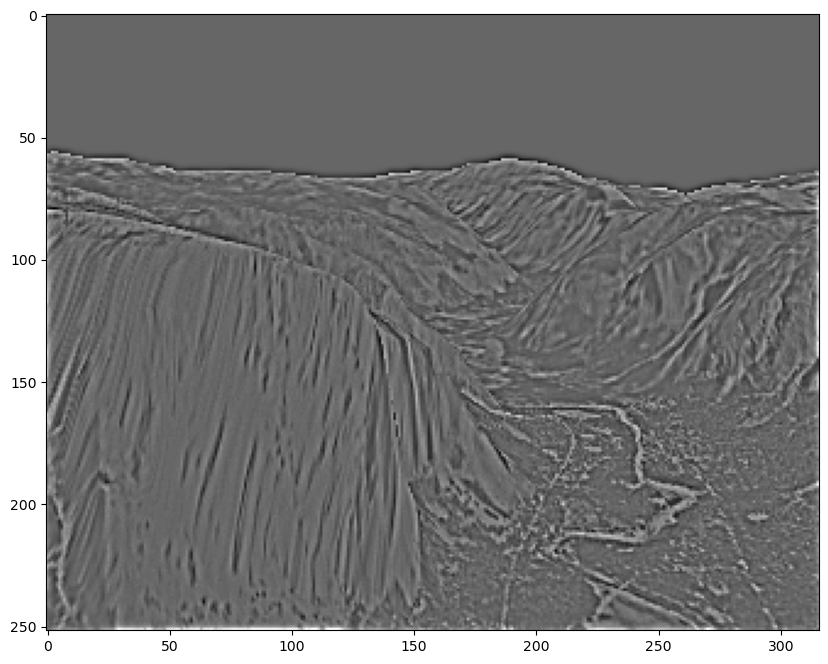

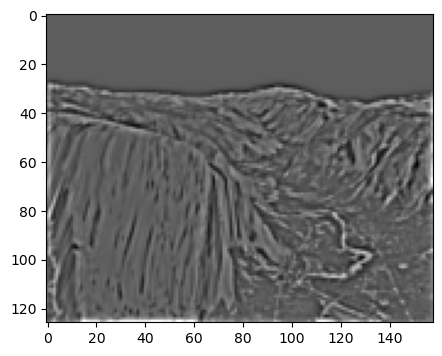

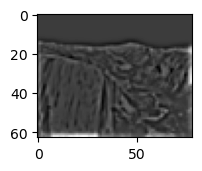

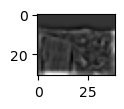

In [10]:
#Implement the 4 level Laplacian Pyramid
level0 = im1_dataseq1 - expanded_im1_0_level
plt.figure(figsize=(np.shape(level0)[1]//30,np.shape(level0)[0]//30))
plt.imshow(level0, cmap='gray')
plt.show()

level1 = g1 - expanded_im1_1_level
plt.figure(figsize=(np.shape(level1)[1]//30,np.shape(level1)[0]//30))
plt.imshow(level1, cmap='gray')
plt.show()

level2=g2-expanded_im1_2_level
plt.figure(figsize=(np.shape(level2)[1]//30,np.shape(level2)[0]//30))
plt.imshow(level2, cmap='gray')
plt.show()

level3=g3-expanded_im1_3_level
plt.figure(figsize=(np.shape(level3)[1]//30,np.shape(level3)[0]//30))
plt.imshow(level3, cmap='gray')
plt.show()



2 Lucas Kanade optic flow


In [11]:
def LK(image1, image2, der=15, sw=5):

    der = np.ones((der, der))
    

    kernel = cv.getGaussianKernel(sw, sigma=0) * cv.getGaussianKernel(sw, sigma=0).T
    image1 = cv.filter2D(image1.copy(), cv.CV_64F, kernel)
    image2 = cv.filter2D(image2.copy(), cv.CV_64F, kernel)

    # Compute the derivatives of the images
    x_gradient_kernel = 0.5 * np.array([[-1, 0, 1]])
    y_gradient_kernel = 0.5 * np.array([[-1], [0], [1]])

    I_x = cv.filter2D(image1, cv.CV_64F, x_gradient_kernel, borderType=cv.BORDER_CONSTANT)
    I_y = cv.filter2D(image1, cv.CV_64F, y_gradient_kernel, borderType=cv.BORDER_CONSTANT)
    I_t = image2 - image1

    # Compute the sums of the derivatives
    I_x_squared = cv.filter2D(I_x**2, cv.CV_64F, der)
    I_y_squared = cv.filter2D(I_y**2, cv.CV_64F, der)
    I_x_y = cv.filter2D(I_x * I_y, cv.CV_64F, der)
    I_x_t = cv.filter2D(I_x * I_t, cv.CV_64F, der)
    I_y_t = cv.filter2D(I_y * I_t, cv.CV_64F, der)

    u = np.zeros(np.shape(image1))
    v = np.zeros(np.shape(image1))

    for i in range(np.shape(image1)[0]):
        for j in range(np.shape(image1)[1]):
            # Matrix A
            A = np.array([[I_x_squared[i, j], I_x_y[i, j]], [I_x_y[i, j], I_y_squared[i, j]]])

            # Vector b
            b = np.array([-I_x_t[i, j], -I_y_t[i, j]])

            # Optical flow
            if np.linalg.det(A) != 0:
                flow = np.linalg.inv(A).dot(b)
                u[i, j] = flow[0]
                v[i, j] = flow[1]

    

    return u, v

In [52]:
def plotOpticalFlow(image1, u, v):
    
    # Plot the first image
    plt.imshow(image1, cmap='gray')
    
    # Values at every 8th pixel
    u_quiver = np.zeros((np.shape(image1)[0], np.shape(image1)[1]))
    v_quiver = np.zeros((np.shape(image1)[0], np.shape(image1)[1]))
    u_quiver[::8, ::8] = u[::8, ::8]
    v_quiver[::8, ::8] = v[::8, ::8]
    
    # Create arrays for the x and y coordinates of the quiver plot
    xdim = np.shape(image1)[1]
    ydim = np.shape(image1)[0]
    idx_x = np.arange(xdim)
    idx_y = np.arange(ydim)
    idx_x, idx_y = np.meshgrid(idx_x, idx_y)
    
    # Non-zero elements of the u and v components of the optical flow
    non_0 = np.logical_or(u_quiver != 0, v_quiver != 0)
    
    # Extract the non-zero elements of the x and y coordinates and the u and v components of the optical flow
    X = idx_x[non_0]
    Y = idx_y[non_0]
    U = u_quiver[non_0]
    V = v_quiver[non_0]
    
    # Plot the quiver plot
    plt.quiver(X, Y, U, V, color='red', scale_units='xy', angles='xy', scale=0.2, width=0.002)
    
    
    plt.show()

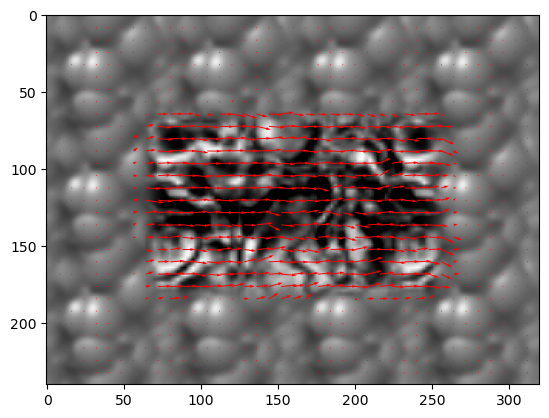

In [13]:
#Read images from TestSeq
Shift0 = cv.imread('TestSeq\Shift0.png', cv.IMREAD_GRAYSCALE)
ShiftR2 = cv.imread('TestSeq\ShiftR2.png', cv.IMREAD_GRAYSCALE)
ShiftR5U5 = cv.imread('TestSeq\ShiftR5U5.png', cv.IMREAD_GRAYSCALE)

u1, v1 = LK(Shift0, ShiftR2, 15,5) 
plotOpticalFlow(Shift0, u1, v1)


After trying out different parameters we get that a window size of 15 shows good results. A smoothing window of size 15 was used.

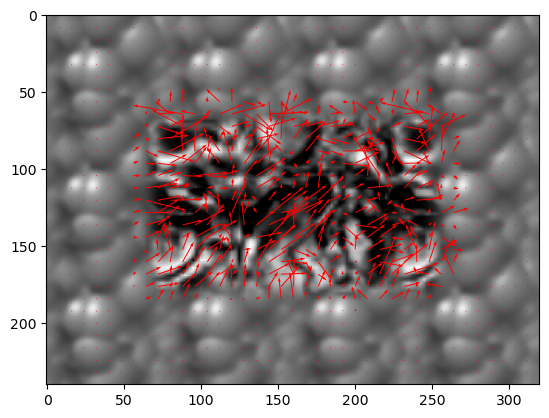

In [14]:
u2, v2 = LK(Shift0, ShiftR5U5, 15,5)
plotOpticalFlow(Shift0, u2, v2)

We can see that the results obtained using the same parameters for the smoothing window and the derivative kernel are not good enough. So we try with different parameters, 50 and 15, getting better results.

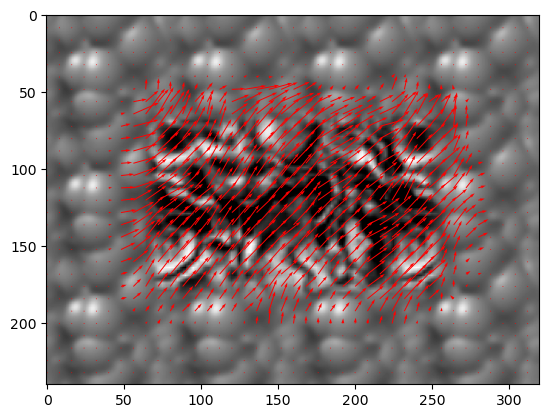

In [15]:
u2, v2 = LK(Shift0, ShiftR5U5, 50,15)
plotOpticalFlow(Shift0, u2, v2)

2.2 Now try the code comparing the base image Shift0 with the remaining images of ShiftR10,
ShiftR20 and ShiftR40. Use the same amount of blurring as you did in the previous
section. Does it still work? Does it fall apart on any of the pairs?

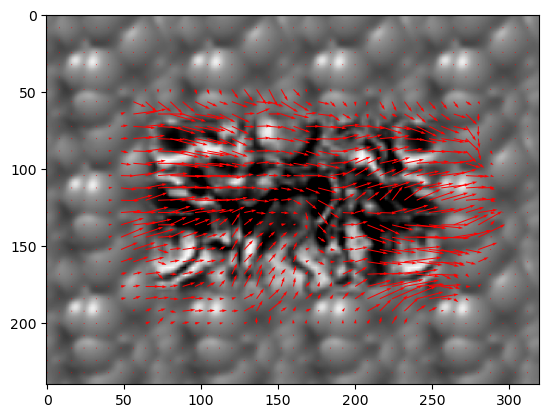

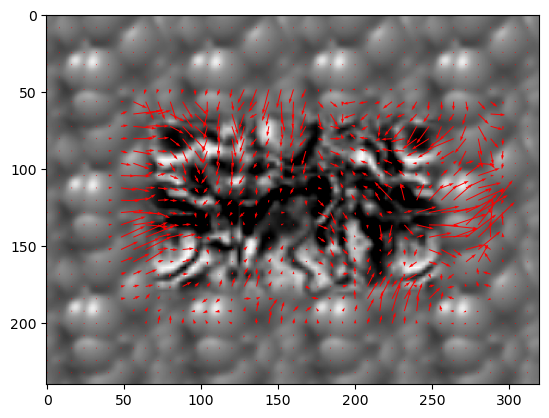

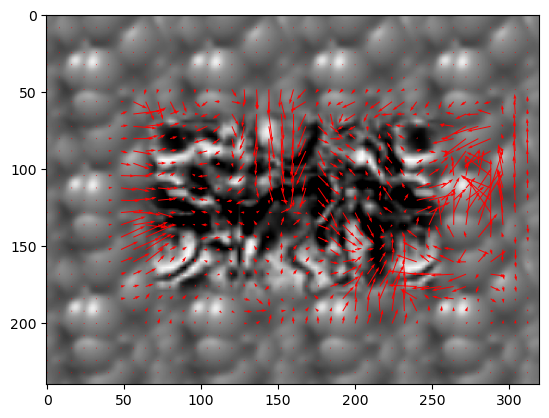

In [16]:
ShiftR10 = cv.imread('TestSeq\ShiftR10.png', cv.IMREAD_GRAYSCALE)
ShiftR20 = cv.imread('TestSeq\ShiftR20.png', cv.IMREAD_GRAYSCALE)
ShiftR40 = cv.imread('TestSeq\ShiftR40.png', cv.IMREAD_GRAYSCALE)

u3, v3 = LK(Shift0, ShiftR10, 50,15)
plotOpticalFlow(Shift0, u3, v3)

u4, v4 = LK(Shift0, ShiftR20, 50,15)
plotOpticalFlow(Shift0, u4, v4)

u5, v5 = LK(Shift0, ShiftR40, 50,15)
plotOpticalFlow(Shift0, u5, v5)





We can see that for the ShiftR10, the code does not work that bad using the same parameters. However, for ShiftR20 and ShiftR40 it performs badly, as there is too much displacement.

2.3 Apply your single-level LK code to theDataSeq1 sequence (from 1 to 2 and 2 to 3)

In [17]:
# Warping function
def warp(im, u, v):
    idx_x = np.arange(np.shape(im)[1])
    idx_y = np.arange( np.shape(im)[0])
    idx_x, idx_y = np.meshgrid(idx_x, idx_y)
    # Warped image
    warped = cv.remap(im.copy(), (idx_x + u).astype(np.float32), (idx_y + v).astype(np.float32), cv.INTER_LINEAR)
    
    return warped

In [18]:
im1_dataseq1 = cv.imread('DataSeq1\yos_img_01.jpg', cv.IMREAD_GRAYSCALE)
im2_dataseq1 = cv.imread('DataSeq1\yos_img_02.jpg', cv.IMREAD_GRAYSCALE)
im3_dataseq1 = cv.imread('DataSeq1\yos_img_03.jpg', cv.IMREAD_GRAYSCALE)

g1_im1_seq1=reduction(im1_dataseq1)
g2_im1_seq1=reduction(g1_im1_seq1)
g3_im1_seq1=reduction(g2_im1_seq1)
g4_im1_seq1=reduction(g3_im1_seq1)

exp0 = np.shape(im1_dataseq1)[0] - 2 * np.shape(g1)[0]
exp1= np.shape(g1_im1_seq1)[0] - 2 * np.shape(g2_im1_seq1)[0]
exp2 = np.shape(g2_im1_seq1)[0] - 2 * np.shape(g3_im1_seq1)[0]
exp3 = np.shape(g3_im1_seq1)[0] - 2 * np.shape(g4_im1_seq1)[0]

expanded_im1_3_level_seq1 = expand(g4_im1_seq1, exp=exp3)
expanded_im1_2_level_seq1 = expand(g3_im1_seq1, exp=exp2)
expanded_im1_1_level_seq1 = expand(g2_im1_seq1, exp=exp1)
expanded_im1_0_level_seq1 = expand(g1_im1_seq1, exp=exp0)

level0_im1_seq1 = im1_dataseq1 - expanded_im1_0_level_seq1
level1_im1_seq1 = g1_im1_seq1 - expanded_im1_1_level_seq1
level2_im1_seq1 = g2_im1_seq1 - expanded_im1_2_level_seq1
level3_im1_seq1 = g3_im1_seq1 - expanded_im1_3_level_seq1

g1_im2_seq1=reduction(im2_dataseq1)
g2_im2_seq1=reduction(g1_im2_seq1)
g3_im2_seq1=reduction(g2_im2_seq1)
g4_im2_seq1=reduction(g3_im2_seq1)

exp0= np.shape(im2_dataseq1)[0] - 2 * np.shape(g1_im2_seq1)[0]
exp1= np.shape(g1_im2_seq1)[0] - 2 * np.shape(g2_im2_seq1)[0]
exp2 = np.shape(g2_im2_seq1)[0] - 2 * np.shape(g3_im2_seq1)[0]
exp3 = np.shape(g3_im2_seq1)[0] - 2 * np.shape(g4_im2_seq1)[0]

expanded_im2_3_level_seq1 = expand(g4_im2_seq1, exp=exp3)
expanded_im2_2_level_seq1 = expand(g3_im2_seq1, exp=exp2)
expanded_im2_1_level_seq1 = expand(g2_im2_seq1, exp=exp1)
expanded_im2_0_level_seq1 = expand(g1_im2_seq1, exp=exp0)

level0_im2_seq1 = im2_dataseq1 - expanded_im2_0_level_seq1
level1_im2_seq1 = g1_im2_seq1 - expanded_im2_1_level_seq1   
level2_im2_seq1 = g2_im2_seq1 - expanded_im2_2_level_seq1
level3_im2_seq1 = g3_im2_seq1 - expanded_im2_3_level_seq1

g1_im3_seq1=reduction(im3_dataseq1)
g2_im3_seq1=reduction(g1_im3_seq1)
g3_im3_seq1=reduction(g2_im3_seq1)
g4_im3_seq1=reduction(g3_im3_seq1)

exp0= np.shape(im3_dataseq1)[0] - 2 * np.shape(g1_im3_seq1)[0]
exp1= np.shape(g1_im3_seq1)[0] - 2 * np.shape(g2_im3_seq1)[0]
exp2 = np.shape(g2_im3_seq1)[0] - 2 * np.shape(g3_im3_seq1)[0]
exp3 = np.shape(g3_im3_seq1)[0] - 2 * np.shape(g4_im3_seq1)[0]

expanded_im3_3_level_seq1 = expand(g4_im3_seq1, exp=exp3)
expanded_im3_2_level_seq1 = expand(g3_im3_seq1, exp=exp2)
expanded_im3_1_level_seq1 = expand(g2_im3_seq1, exp=exp1)
expanded_im3_0_level_seq1 = expand(g1_im3_seq1, exp=exp0)

level0_im3_seq1 = im3_dataseq1 - expanded_im3_0_level_seq1
level1_im3_seq1 = g1_im3_seq1 - expanded_im3_1_level_seq1
level2_im3_seq1 = g2_im3_seq1 - expanded_im3_2_level_seq1
level3_im3_seq1 = g3_im3_seq1 - expanded_im3_3_level_seq1


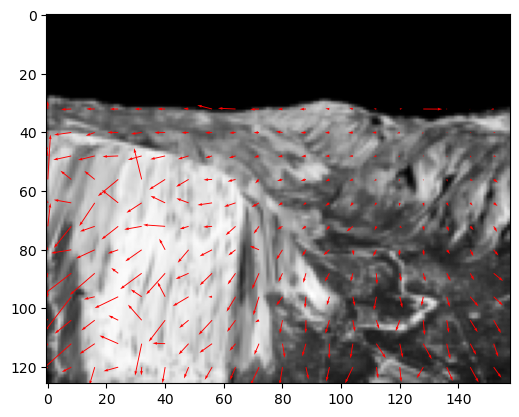

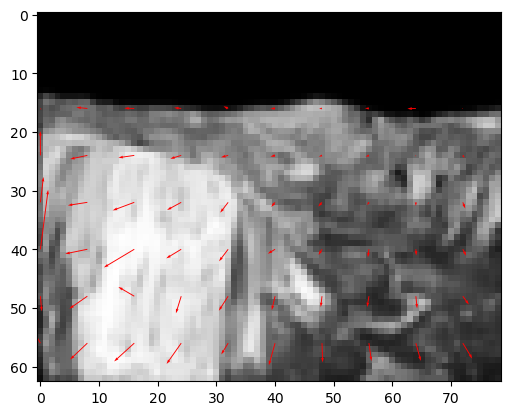

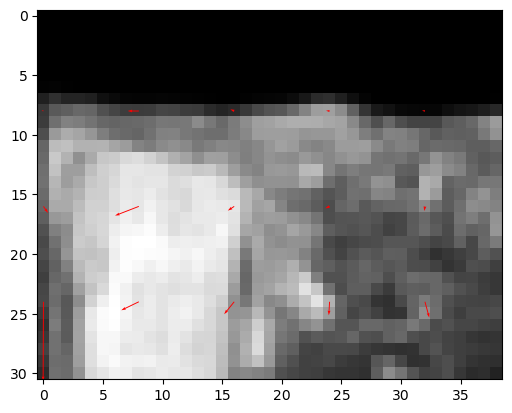

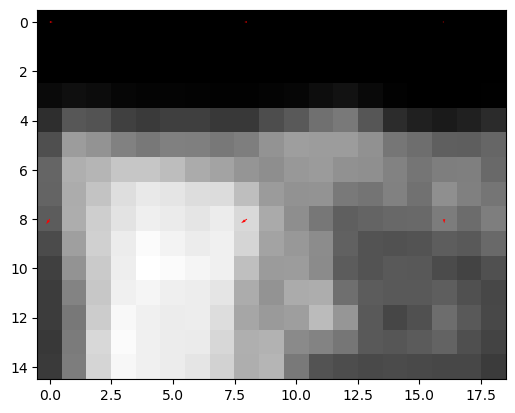

In [19]:
u12_seq1_l0, v12_seq1_l0 = LK(g1_im1_seq1, g1_im2_seq1, 5, 1)
u12_seq1_l1, v12_seq1_l1 = LK(g2_im1_seq1, g2_im2_seq1, 5, 1)
u12_seq1_l2, v12_seq1_l2 = LK(g3_im1_seq1, g3_im2_seq1, 5, 1)
u12_seq1_l3, v12_seq1_l3 = LK(g4_im1_seq1, g4_im2_seq1, 5, 1)

#Plotting the results
plotOpticalFlow(g1_im1_seq1, u12_seq1_l0, v12_seq1_l0)
plotOpticalFlow(g2_im1_seq1, u12_seq1_l1, v12_seq1_l1)
plotOpticalFlow(g3_im1_seq1, u12_seq1_l2, v12_seq1_l2)
plotOpticalFlow(g4_im1_seq1, u12_seq1_l3, v12_seq1_l3)

Text(0.5, 1.0, 'Level 4: Image 2 warped')

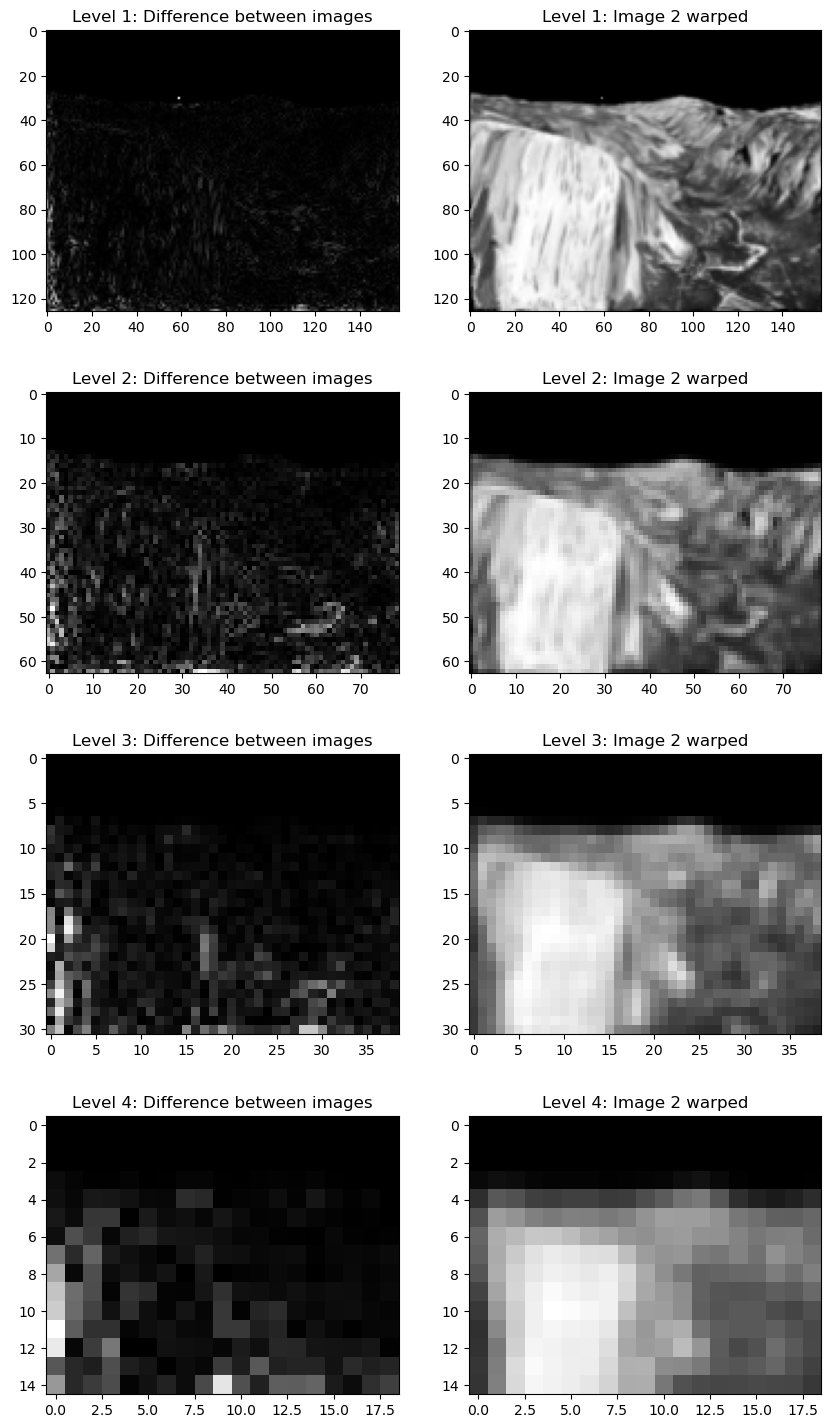

In [53]:
im2_seq1_warped_l0 = warp(g1_im2_seq1, u12_seq1_l0, v12_seq1_l0)
im2_seq1_warped_l1 = warp(g2_im2_seq1, u12_seq1_l1, v12_seq1_l1)
im2_seq1_warped_l2 = warp(g3_im2_seq1, u12_seq1_l2, v12_seq1_l2)
im2_seq1_warped_l3 = warp(g4_im2_seq1, u12_seq1_l3, v12_seq1_l3)

fig, ax = plt.subplots(4, 2, figsize = (10, 18))

ax[0, 0].imshow(np.abs(g1_im1_seq1-im2_seq1_warped_l0).astype(np.float32), cmap = 'gray')
ax[0, 0].set_title('Level 1: Difference between images')
ax[0, 1].imshow(im2_seq1_warped_l0, cmap = 'gray')
ax[0, 1].set_title('Level 1: Image 2 warped')
ax[1, 0].imshow(np.abs(g2_im1_seq1-im2_seq1_warped_l1).astype(np.float32), cmap = 'gray')
ax[1, 0].set_title('Level 2: Difference between images')
ax[1, 1].imshow(im2_seq1_warped_l1, cmap = 'gray')
ax[1, 1].set_title('Level 2: Image 2 warped')
ax[2, 0].imshow(np.abs(g3_im1_seq1-im2_seq1_warped_l2).astype(np.float32), cmap = 'gray')
ax[2, 0].set_title('Level 3: Difference between images')
ax[2, 1].imshow(im2_seq1_warped_l2, cmap = 'gray')
ax[2, 1].set_title('Level 3: Image 2 warped')
ax[3, 0].imshow(np.abs(g4_im1_seq1-im2_seq1_warped_l3).astype(np.float32), cmap = 'gray')
ax[3, 0].set_title('Level 4: Difference between images')
ax[3, 1].imshow(im2_seq1_warped_l3, cmap = 'gray')
ax[3, 1].set_title('Level 4: Image 2 warped')


In [21]:
# Load the images of the DataSeq2 sequence
im1_seq2 = cv.imread('DataSeq2\Seq2_0.png', cv.IMREAD_GRAYSCALE)
im2_seq2 = cv.imread('DataSeq2\Seq2_1.png', cv.IMREAD_GRAYSCALE)
im3_seq2 = cv.imread('DataSeq2\Seq2_2.png', cv.IMREAD_GRAYSCALE)
# Laplacian pyramids of the images of DataSeq2
g1_im1_seq2 = reduction(im1_seq2)
g2_im1_seq2 = reduction(g1_im1_seq2)
g3_im1_seq2 = reduction(g2_im1_seq2)
g4_im1_seq2 = reduction(g3_im1_seq2)

g1_im2_seq2 = reduction(im2_seq2)
g2_im2_seq2 = reduction(g1_im2_seq2)
g3_im2_seq2 = reduction(g2_im2_seq2)
g4_im2_seq2 = reduction(g3_im2_seq2)


In [22]:
# Repeat the process for the second sequence
u12_seq2_l1, v12_seq2_l1 = LK(g1_im1_seq2, g1_im2_seq2, 3, 1)
u12_seq2_l2, v12_seq2_l2 = LK(g2_im1_seq2, g2_im2_seq2, 3, 1)
u12_seq2_l3, v12_seq2_l3 = LK(g3_im1_seq2, g3_im2_seq2, 3, 1)
u12_seq2_l4, v12_seq2_l4 = LK(g4_im1_seq2, g4_im2_seq2, 3, 1)

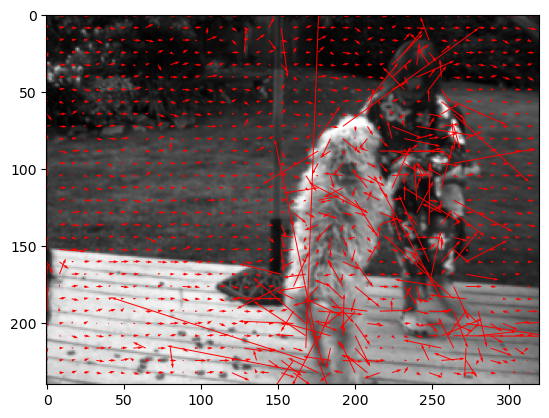

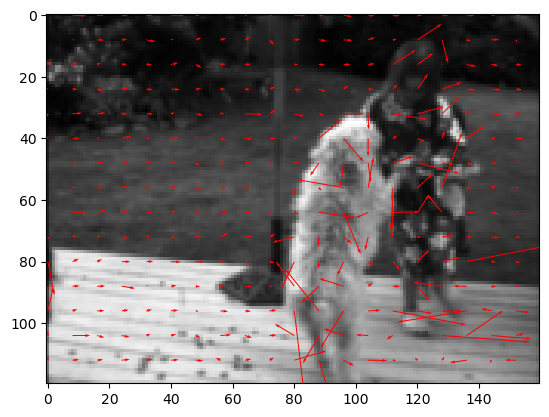

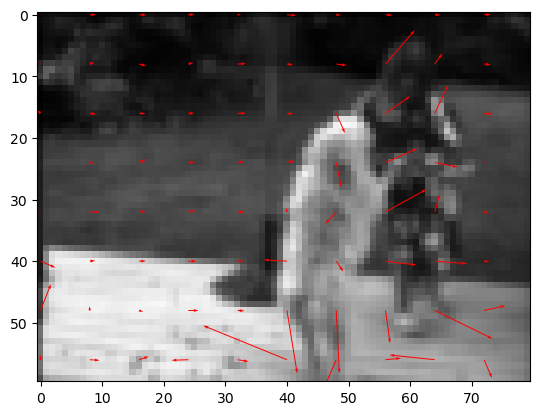

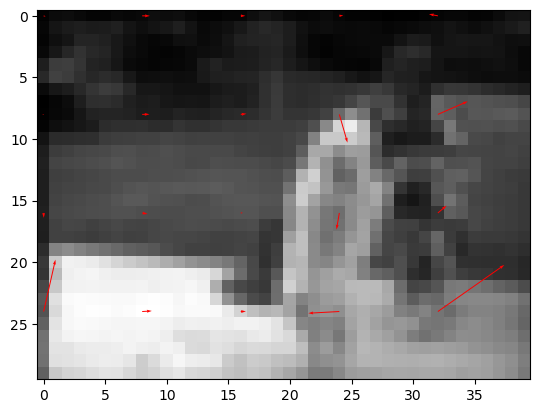

In [23]:
#Plotting the results
plotOpticalFlow(g1_im1_seq2, u12_seq2_l1, v12_seq2_l1)
plotOpticalFlow(g2_im1_seq2, u12_seq2_l2, v12_seq2_l2)
plotOpticalFlow(g3_im1_seq2, u12_seq2_l3, v12_seq2_l3)
plotOpticalFlow(g4_im1_seq2, u12_seq2_l4, v12_seq2_l4)



Text(0.5, 1.0, 'Level 4: Img 2 warped')

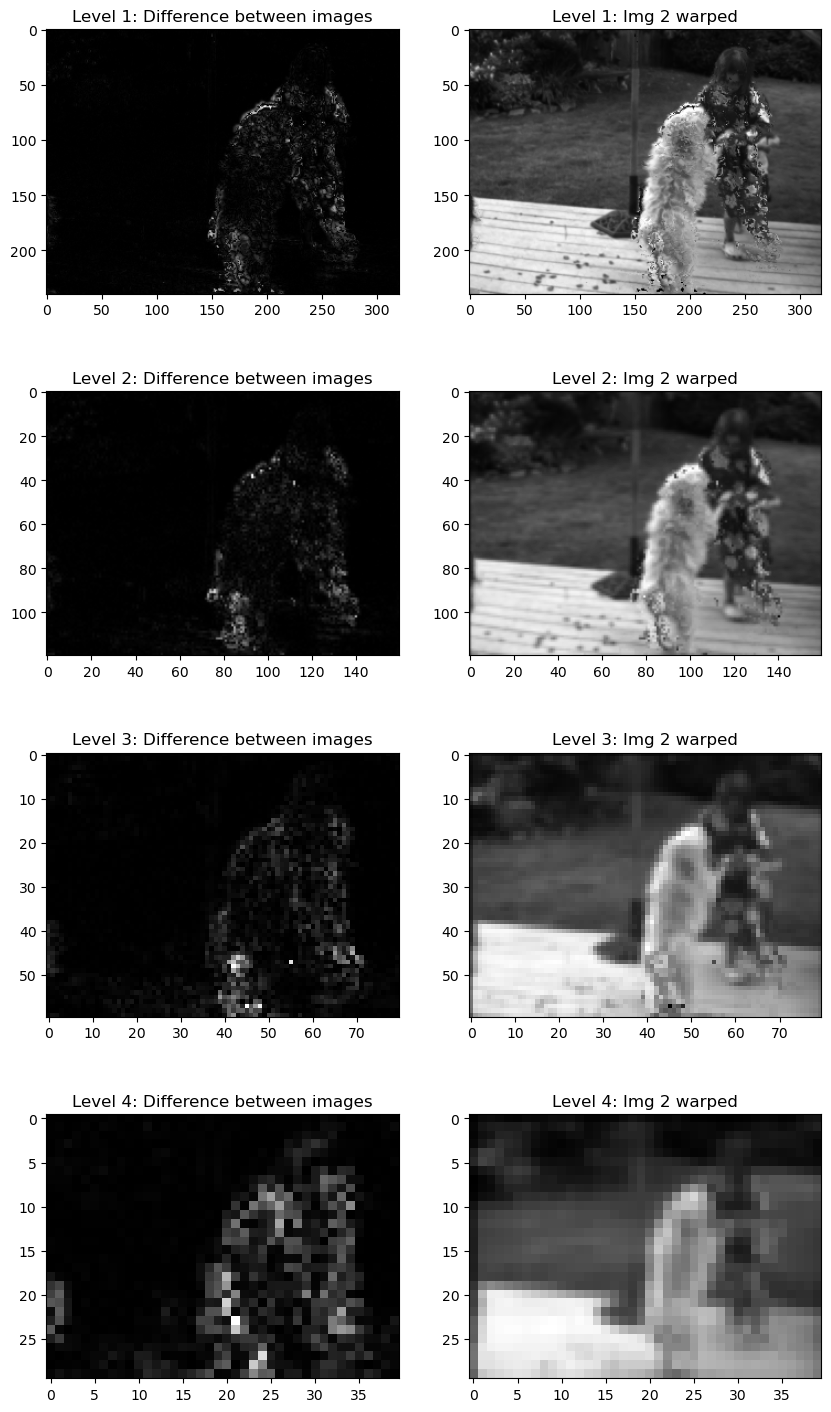

In [24]:
im2_seq2_warped_l1 = warp(g1_im2_seq2, u12_seq2_l1, v12_seq2_l1)
im2_seq2_warped_l2 = warp(g2_im2_seq2, u12_seq2_l2, v12_seq2_l2)
im2_seq2_warped_l3 = warp(g3_im2_seq2, u12_seq2_l3, v12_seq2_l3)
im2_seq2_warped_l4 = warp(g4_im2_seq2, u12_seq2_l4, v12_seq2_l4)

fig, ax = plt.subplots(4, 2, figsize = (10, 18))

ax[0, 0].imshow(np.abs((g1_im1_seq2-im2_seq2_warped_l1)).astype(np.float32), cmap = 'gray')
ax[0, 0].set_title('Level 1: Difference between images')
ax[0, 1].imshow(im2_seq2_warped_l1, cmap = 'gray')
ax[0, 1].set_title('Level 1: Img 2 warped')
ax[1, 0].imshow(np.abs(g2_im1_seq2-im2_seq2_warped_l2).astype(np.float32), cmap = 'gray')
ax[1, 0].set_title('Level 2: Difference between images')
ax[1, 1].imshow(im2_seq2_warped_l2, cmap = 'gray')
ax[1, 1].set_title('Level 2: Img 2 warped')
ax[2, 0].imshow(np.abs(g3_im1_seq2-im2_seq2_warped_l3).astype(np.float32), cmap = 'gray')
ax[2, 0].set_title('Level 3: Difference between images')
ax[2, 1].imshow(im2_seq2_warped_l3, cmap = 'gray')
ax[2, 1].set_title('Level 3: Img 2 warped')
ax[3, 0].imshow(np.abs(g4_im1_seq2-im2_seq2_warped_l4).astype(np.float32), cmap = 'gray')
ax[3, 0].set_title('Level 4: Difference between images')
ax[3, 1].imshow(im2_seq2_warped_l4, cmap = 'gray')
ax[3, 1].set_title('Level 4: Img 2 warped')

3. Hierarchical LK optic flow

3.1 Write the function to compute the hierarchical LK (surprised, huh?). First apply to the
TestSeq for the displacements of 10, 20 and 40 pixels. Then apply to both DataSeq1 and
DataSeq2.

In [54]:
#Define new expand function to implement the HLK
def new_expand(image, destination_size, interpolation=None):
    resized_image = cv.resize(image, destination_size[1::-1], interpolation=interpolation or cv.INTER_LINEAR)
    blurred_image = cv.GaussianBlur(resized_image, (5, 5), 0)
    return blurred_image

def reduce_to_level(image, target_level):
    reduced_image = image.copy()
    for i in range(target_level):
        reduced_image = reduction(reduced_image)  
    return reduced_image


def expand_to_size(image, size):
    return expand(image, size, interpolation=cv.INTER_LINEAR)

In [56]:
# write the function to compute the hierarchical Lucas-Kanade optical flow
def HLK(L_image, R_image, max):
    n = max
    U, V = None, None

    while n >= 0:
        Left = reduce_to_level(L_image, n)
        Right = reduce_to_level(R_image, n)

        if n == max:
            U = np.zeros_like(Left, dtype=np.float32)
            V = np.zeros_like(Left, dtype=np.float32)
        else:
            U = 2 * expand_to_size(U, Left.shape)
            V = 2 * expand_to_size(V, Left.shape)


        if np.shape(U[0]) != np.shape(Left[0]):
            U[0] = cv.resize(U[0], (np.shape(Left[0])[1], np.shape(Left[0])[0]))
        

        if np.shape(V[0]) != np.shape(Left[0]):
            V[0] = cv.resize(V[0], (np.shape(Left[0])[1], np.shape(Left[0])[0]))

        warped_img = warp(Left, U, V)

        Dx, Dy = LK(warped_img, Right)
        #Parameters update
        U = U + Dx
        V = V + Dy
        n = n - 1
    return U, V



In [57]:
#There is not going to be a movement higher than 50 pixels, so we assume the maximum level is log2(50)
max_level = int(np.log2(50))
# Compute the optical flows
u_10, v_10 = HLK(Shift0, ShiftR10,max_level)
u_20, v_20 = HLK(Shift0, ShiftR20,max_level)
u_40, v_40 = HLK(Shift0, ShiftR40,max_level)

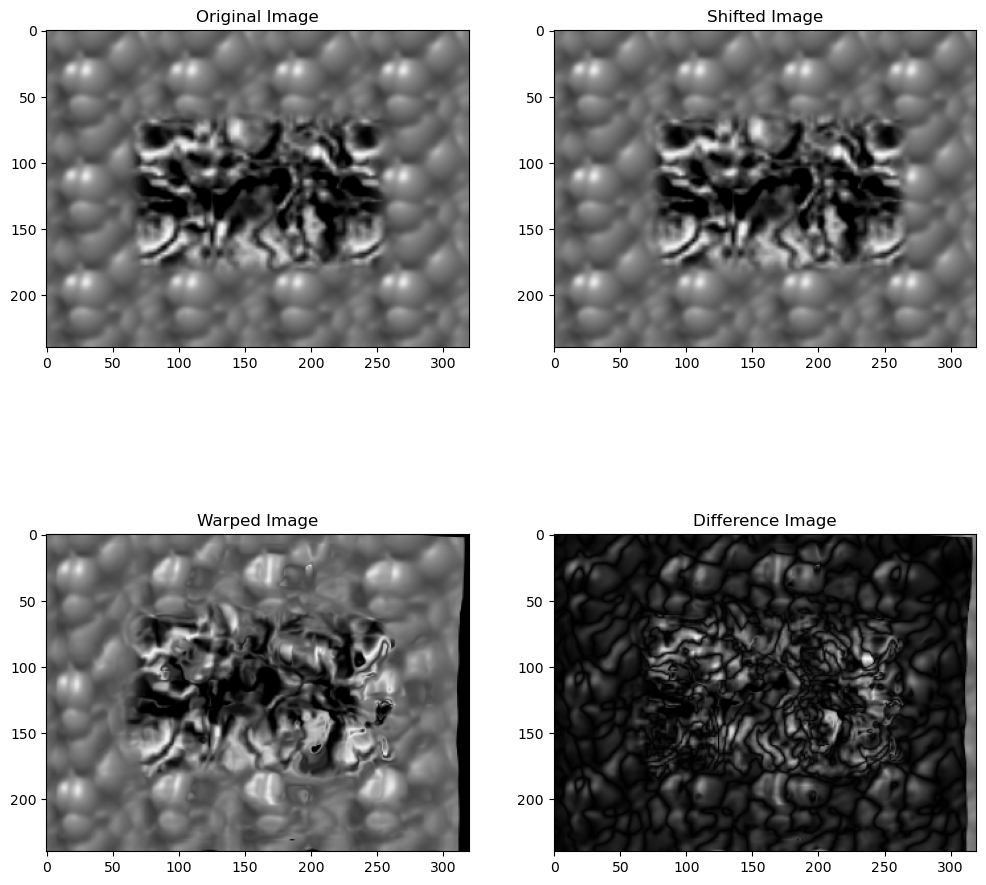

In [58]:
# Warping and computing difference images 

warped_10pixels = warp(ShiftR10, u_10, v_10)
difference_10pixels = cv.absdiff(Shift0, warped_10pixels)

# Plot results
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(Shift0, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(ShiftR10, cv.COLOR_BGR2RGB))
plt.title('Shifted Image')

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(warped_10pixels, cv.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(difference_10pixels, cv.COLOR_BGR2RGB))
plt.title('Difference Image')
plt.show()

In [29]:
#Apply the Herarchical Lucas Kanade algorithm to the DataSeq1 and DataSeq2 sequences
#Sequence 1
u12_seq1, v12_seq1 = HLK(im1_dataseq1, im2_dataseq1, max_level)
u13_seq1, v13_seq1 = HLK(im1_dataseq1, im3_dataseq1, max_level)

#Sequence 2
u12_seq2, v12_seq2 = HLK(im1_seq2, im2_seq2, max_level)   
u13_seq2, v13_seq2 = HLK(im1_seq2, im3_seq2, max_level)



In [30]:
# Warping and computing difference images
data_seq1_warped_1 = warp(im2_dataseq1, u12_seq1, v12_seq1)
data_seq1_warped_2 = warp(im3_dataseq1, u13_seq1, v13_seq1)

data_seq2_warped_1 = warp(im2_seq2, u12_seq2, v12_seq2)
data_seq2_warped_2 = warp(im3_seq2, u13_seq2, v13_seq2)

difference_1 = cv.absdiff(im1_dataseq1, data_seq1_warped_1)
difference_2 = cv.absdiff(im1_dataseq1, data_seq1_warped_2)

difference_3 = cv.absdiff(im1_seq2, data_seq2_warped_1)
difference_4 = cv.absdiff(im1_seq2, data_seq2_warped_2)

Text(0.5, 1.0, 'Difference Image')

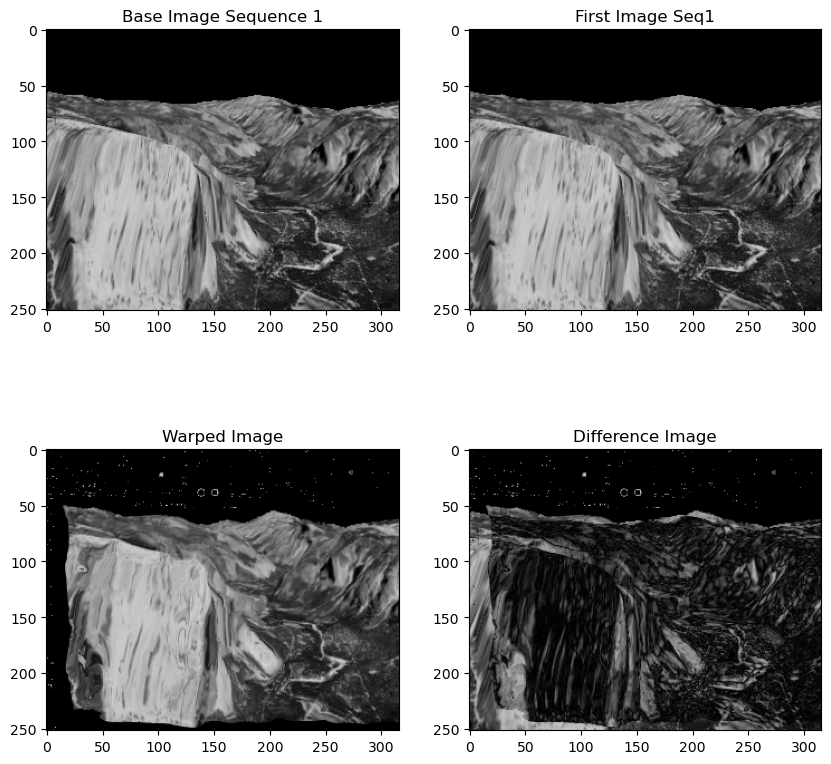

In [32]:
# Plot results for first image in DataSeq1
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(im1_dataseq1, cv.COLOR_BGR2RGB))
plt.title('Base Image Sequence 1')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(im2_dataseq1, cv.COLOR_BGR2RGB))
plt.title('First Image Seq1')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(data_seq1_warped_1, cv.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(difference_1, cv.COLOR_BGR2RGB)) 
plt.title('Difference Image')

Text(0.5, 1.0, 'Difference Image')

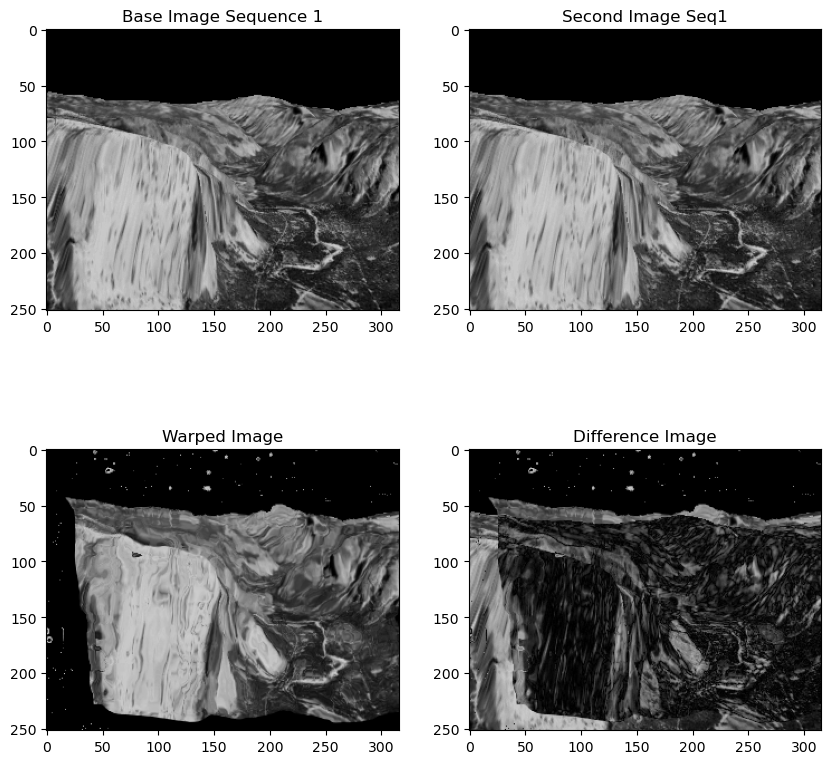

In [33]:
# Plot results for second image in DataSeq1
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(im1_dataseq1, cv.COLOR_BGR2RGB))
plt.title('Base Image Sequence 1')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(im3_dataseq1, cv.COLOR_BGR2RGB))
plt.title('Second Image Seq1')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(data_seq1_warped_2, cv.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(difference_2, cv.COLOR_BGR2RGB)) 
plt.title('Difference Image')



Text(0.5, 1.0, 'Difference Image')

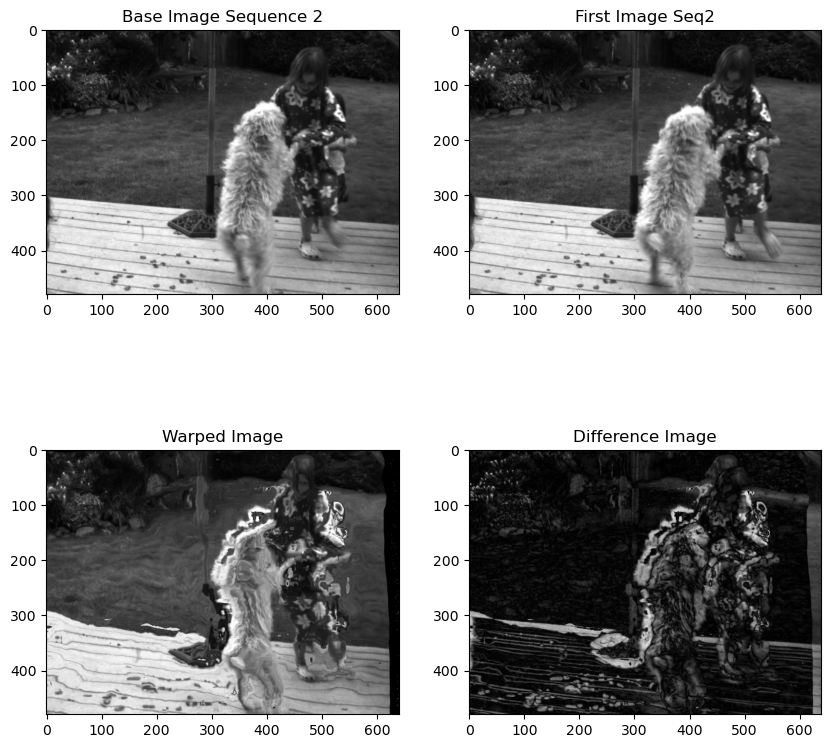

In [34]:
# Plot results for first image in DataSeq2
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(im1_seq2, cv.COLOR_BGR2RGB))
plt.title('Base Image Sequence 2')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(im2_seq2, cv.COLOR_BGR2RGB))
plt.title('First Image Seq2')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(data_seq2_warped_1, cv.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(difference_3, cv.COLOR_BGR2RGB))
plt.title('Difference Image')

Text(0.5, 1.0, 'Difference Image')

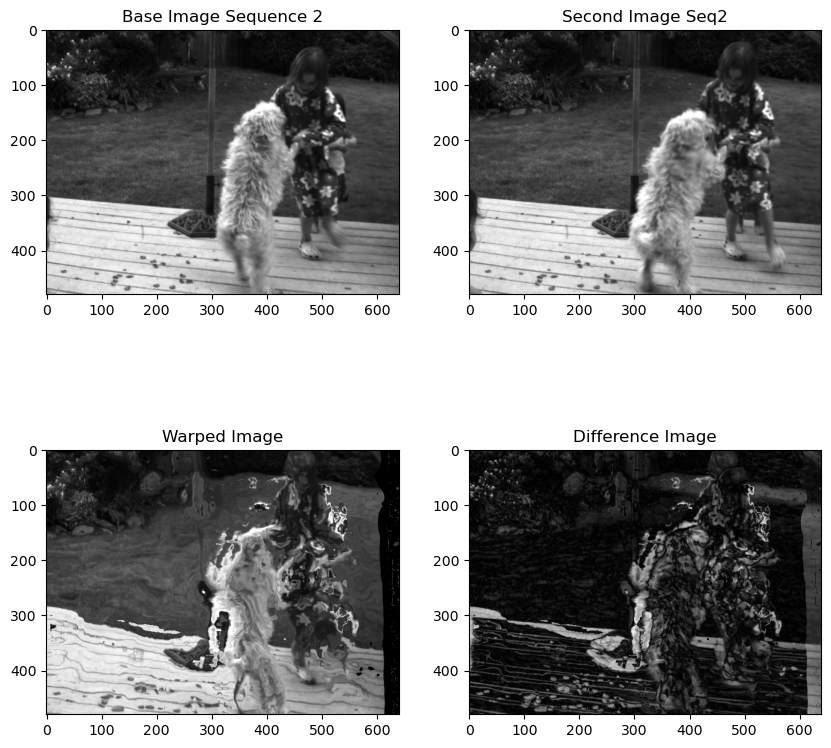

In [35]:
# Plot results for second image in DataSeq2
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(im1_seq2, cv.COLOR_BGR2RGB))
plt.title('Base Image Sequence 2')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(im3_seq2, cv.COLOR_BGR2RGB))
plt.title('Second Image Seq2')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(data_seq2_warped_2, cv.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(difference_4, cv.COLOR_BGR2RGB))
plt.title('Difference Image')


4 The Juggle Sequence

4.1 Apply your hierarchical LK to the Juggle sequence.


In [59]:
# Apply the Herarchical Lucas Kanade algorithm to the Juggle sequence
# Read images
im1_juggle = cv.imread('Juggle\juggle_0.png', cv.IMREAD_GRAYSCALE)
im2_juggle = cv.imread('Juggle\juggle_1.png', cv.IMREAD_GRAYSCALE)
im3_juggle = cv.imread('Juggle\juggle_2.png', cv.IMREAD_GRAYSCALE)

u12_juggle, v12_juggle = HLK(im1_juggle, im2_juggle, max_level)
u13_juggle, v13_juggle = HLK(im1_juggle, im3_juggle, max_level)



In [37]:
# Warping and computing difference images
juggle_warped_1 = warp(im2_juggle, u12_juggle, v12_juggle)
juggle_warped_2 = warp(im3_juggle, u13_juggle, v13_juggle)  

difference_5 = cv.absdiff(im1_juggle, juggle_warped_1)
difference_6 = cv.absdiff(im1_juggle, juggle_warped_2)


Text(0.5, 1.0, 'Difference Image')

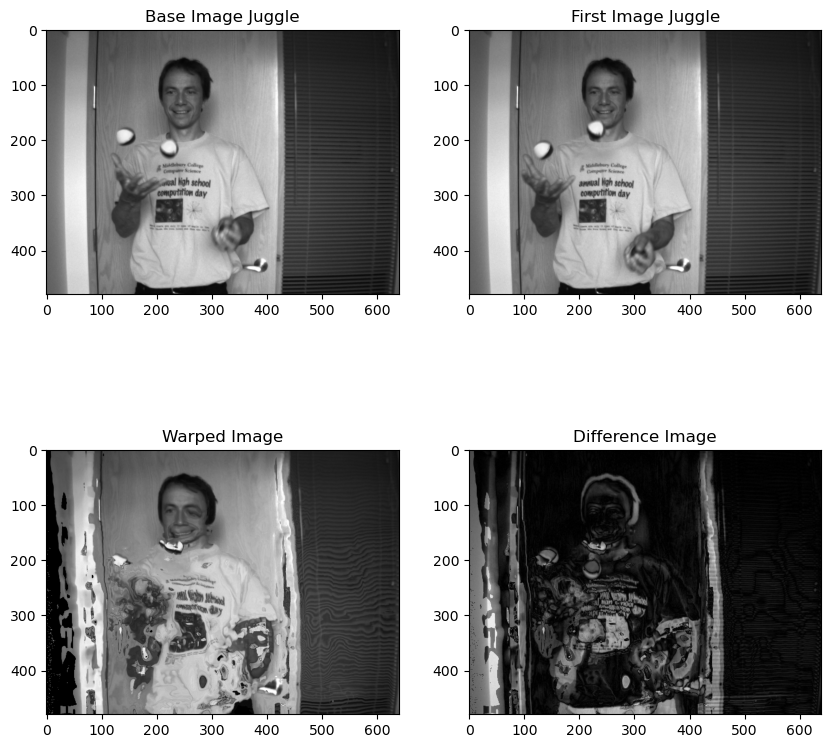

In [38]:
#Plotting the results for first image
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(im1_juggle, cv.COLOR_BGR2RGB))
plt.title('Base Image Juggle')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(im2_juggle, cv.COLOR_BGR2RGB))
plt.title('First Image Juggle')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(juggle_warped_1, cv.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(difference_5, cv.COLOR_BGR2RGB))
plt.title('Difference Image')


Text(0.5, 1.0, 'Difference Image')

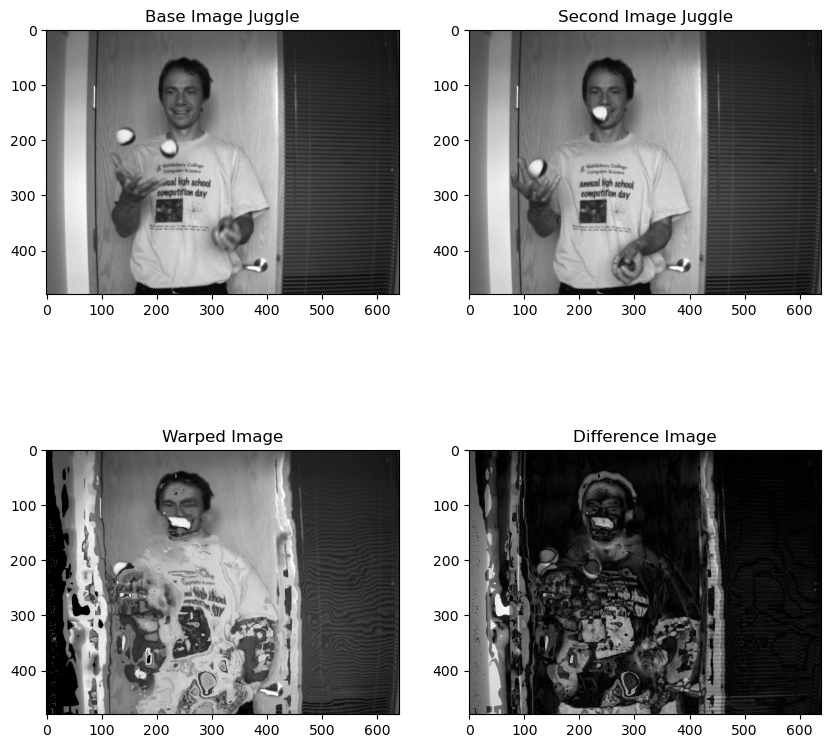

In [39]:
#Plotting the results for second image
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(im1_juggle, cv.COLOR_BGR2RGB))
plt.title('Base Image Juggle')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(im3_juggle, cv.COLOR_BGR2RGB))
plt.title('Second Image Juggle')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(juggle_warped_2, cv.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(difference_6, cv.COLOR_BGR2RGB))
plt.title('Difference Image')

5 The Taxi Sequence


Apply your hierarchical LK to the taxi sequence and then generate a segmentation map based upon consistent motion in the region.

In [49]:
#Read images from Taxis sequence
taxi1 = cv.imread('Taxis/taxi-00.jpg', cv.IMREAD_GRAYSCALE)
taxi2 = cv.imread('Taxis/taxi-01.jpg', cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Difference Image')

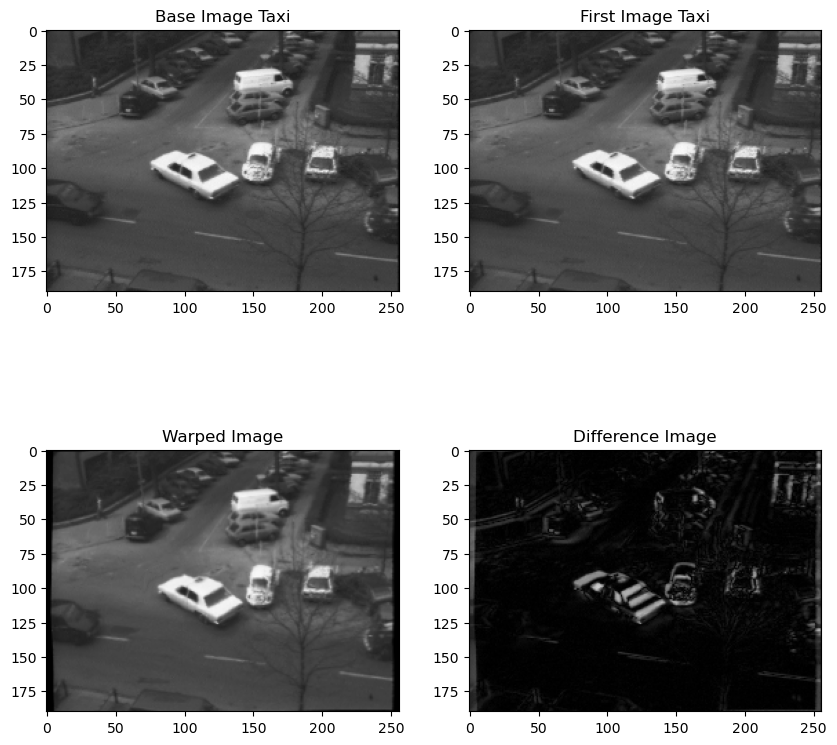

In [51]:
# Apply the Herarchical Lucas Kanade algorithm to the Taxis images
u12_taxi, v12_taxi = HLK(taxi1, taxi2, max_level)

# Warping and computing difference images
taxi_warped = warp(taxi2, u12_taxi, v12_taxi)
difference_7 = cv.absdiff(taxi1, taxi_warped)

#Plotting the results
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(taxi1, cv.COLOR_BGR2RGB))
plt.title('Base Image Taxi')
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(taxi2, cv.COLOR_BGR2RGB))
plt.title('First Image Taxi')
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(taxi_warped, cv.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(difference_7, cv.COLOR_BGR2RGB))
plt.title('Difference Image')

